# Esercitazione 9 

Implemento l'algoritmo per il travelling salesman problem rendendolo più generale possibile, così da essere facilmente adattibili a problemi simili. Fornisco i vari parametri che diversificano le simulazioni tramite il file _input.dat_. Ho preparato dei file _input.c1_, _input.c2_, _input.s1_, _input.s1_ per i 4 casi in esame (c per circonferenza, s per quadrato, il numero indica la loss function). Si possono eseguire tutti contemporaneamente tramite lo script _runall.py_.

Per l'esponente della funzione di selezione, che utilizzo per creare nuove generazioni di individui, scelgo $p=5$, quindi: $j = N \times r^5$. Ho osservato che, per la circonferenza, 5 mi porta a una convergenza rapida dell'algoritmo rispetto a valori più alti o più bassi. Invece per il quadrato, $p=6$ risulta essere più adatto.

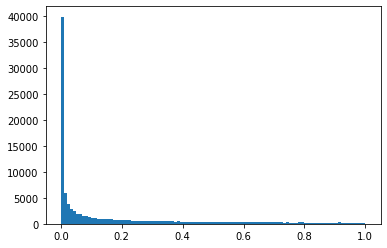

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000
distr = np.random.rand(n)**(5)

plt.hist(distr, bins = 100)
plt.show()

Ho inserito nell'algoritmo una funzione _crossover_, che mi porta a costruire le nuove generazioni selezionando tra gli elementi migliori e, con una probabilità del 60%, facendo crossover tra questi.

Ho aggiunto inoltre degli algoritmi di mutazione genetica, tutti con una probabilità del 10%: 
- _randomswap_: scambia due elementi casuali nella sequenza delle città;
- _contswap_: scambia dei tratti di sequenza, di lunghezza e posizione variabile all'interno della successione di città;
- _shift_: sposta nell'ultima posizione un elemento casuale della sequenza.

Imposto il numero di individui per ogni generazione tra 100 e 200, a seconda dei casi. In ogni situazione, ho osservato quanti individui mi garantiscono una convergenza in relativamente poche generazioni. Il numero di generazioni necessarie prima di arrivare alla convergenza dipende dalla loss function utilizzata e dalla disposizione delle città.

## Circonferenza

Dispongo le città su una circonferenza, come mostrato nella figura di seguito. Questo si ottiene impostando a 0 il parametro ricevuto in ingresso da _tsp.dispose()_.

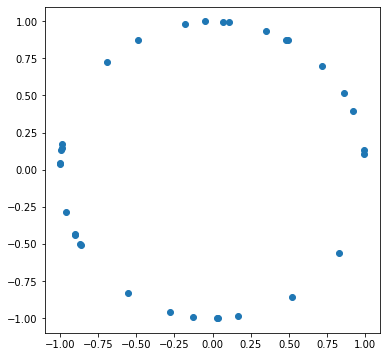

In [2]:
x,y = np.loadtxt("es09/c1/cities.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

Eseguo ora l'algoritmo utilizzando come loss function L1 o L2. Mostro che in entrambi i casi il risultato ottenuto è corretto. 

Utilizzando L1 ho impostato il numero di individui per ogni generazione a $200$,  per L2  $n_{indiv} = 100$.

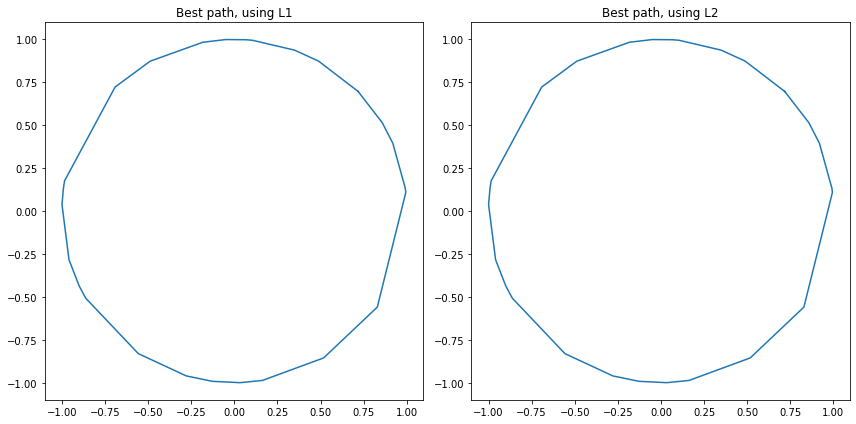

In [3]:
x1,y1 = np.loadtxt("es09/c1/final.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es09/c2/final.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].plot(x1,y1)
axs[0].set_title("Best path, using L1")
axs[1].set_title("Best path, using L2")
axs[1].plot(x2,y2)

Rappresento di seguito l'andamento della loss nei due casi. Ho regolato il numero di generazioni per evitare di continuare a eseguire a lungo l'algoritmo una volta raggiunta la convergenza. 

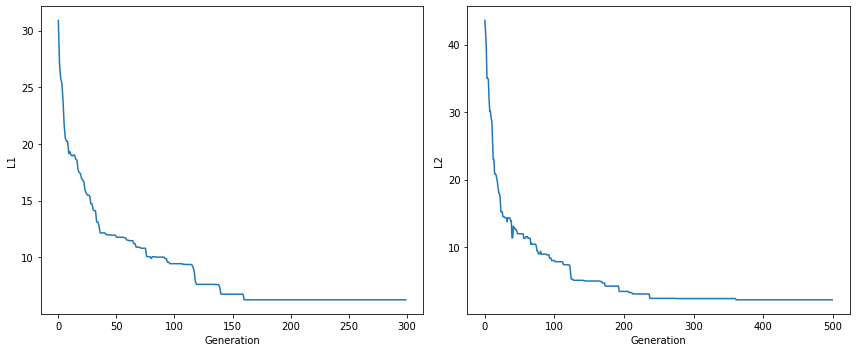

In [4]:
fit1 = np.loadtxt("es09/c1/fitness.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es09/c2/fitness.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_ylabel("L1")
axs[0].set_xlabel("Generation")
axs[1].set_ylabel("L2")
axs[1].set_xlabel("Generation")
axs[1].plot(fit2)

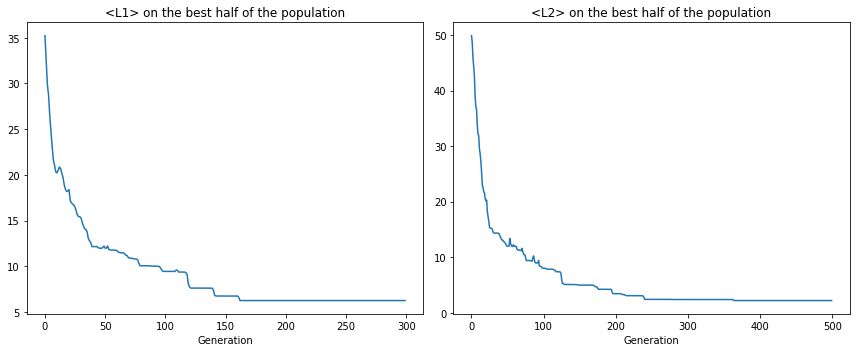

In [5]:
fit1 = np.loadtxt("es09/c1/meanL.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es09/c2/meanL.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].set_title("<L1> on the best half of the population")
axs[0].set_xlabel("Generation")
axs[0].plot(fit1)

axs[1].set_title("<L2> on the best half of the population")
axs[1].set_xlabel("Generation")
axs[1].plot(fit2)

## Quadrato

Eseguo ora la medesima simulazione disponendo le città all'interno di un quadrato di lato 1. E' sufficiente impostare a 1 il parametro che riceve in ingresso la funzione _tsp.dispose()_. Rappresento di seguito la disposizione delle città. 

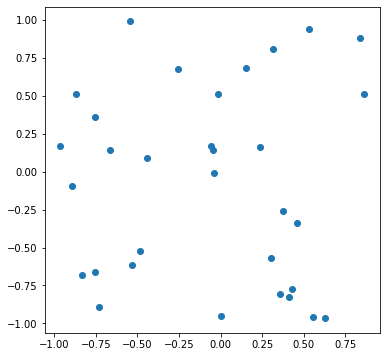

In [6]:
x,y = np.loadtxt("es09/s1/cities.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

Eseguo ora l'algoritmo utilizzando come loss function L1 o L2. Mostro che in entrambi i casi il risultato ottenuto è corretto. 
Utilizzando L1 ho impostato $n_{indiv} = 400$, per L2  $n_{indiv} = 500$.

Inoltre, ho notato che con $p=5$ non si giungeva al best path, pertanto ho posto $p=6$.

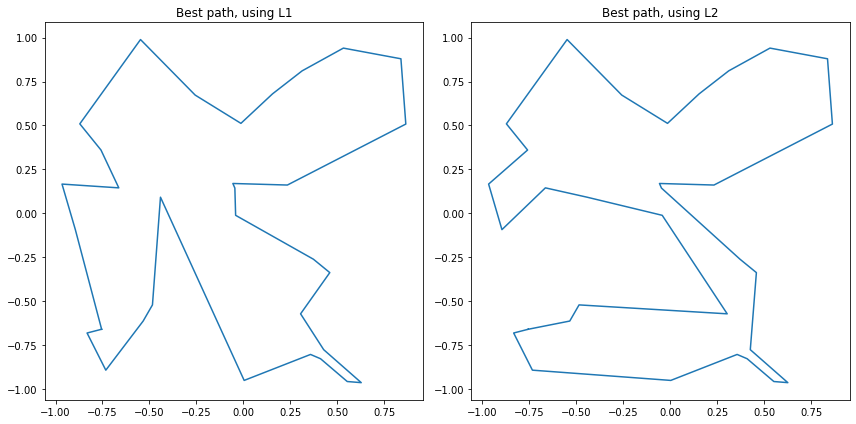

In [7]:
x1,y1 = np.loadtxt("es09/s1/final.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es09/s2/final.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].plot(x1,y1)
axs[0].set_title("Best path, using L1")
axs[1].set_title("Best path, using L2")
axs[1].plot(x2,y2)

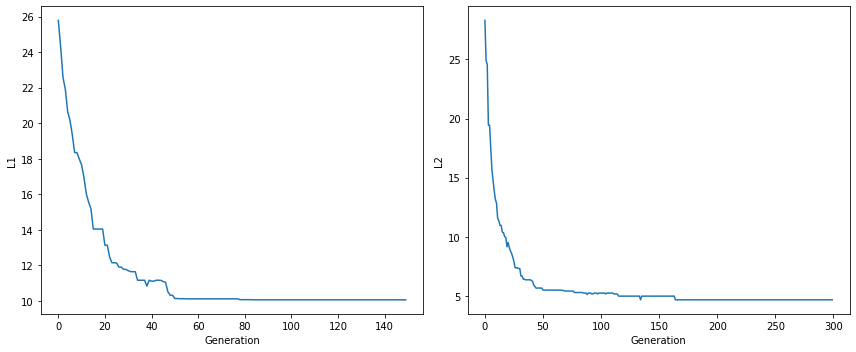

In [8]:
fit1 = np.loadtxt("es09/s1/fitness.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es09/s2/fitness.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_ylabel("L1")
axs[0].set_xlabel("Generation")

axs[1].set_ylabel("L2")
axs[1].set_xlabel("Generation")
axs[1].plot(fit2)

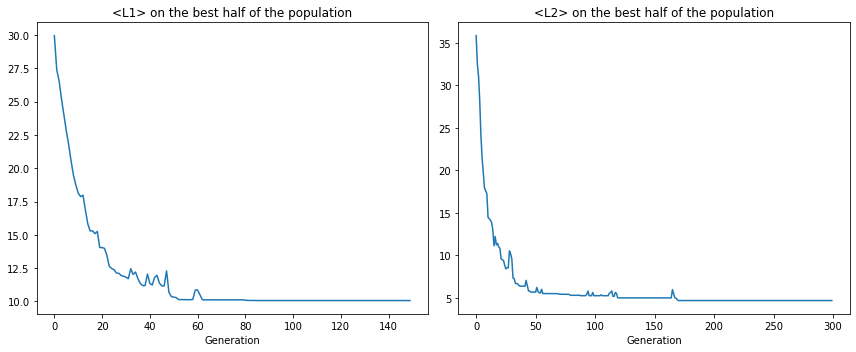

In [9]:
fit1 = np.loadtxt("es09/s1/meanL.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es09/s2/meanL.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_title("<L1> on the best half of the population")
axs[0].set_xlabel("Generation")

axs[1].set_title("<L2> on the best half of the population")
axs[1].set_xlabel("Generation")
axs[1].plot(fit2)

Le due loss function raggiungono valori minimi diversi, come è ovvio essendo due estimatori diversi. 